In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)

# 9. The VAR Model

### VAR on Walmart Sales

In [3]:
# Import the dataframe

url1 = ('https://raw.githubusercontent.com/abhinav-bhardwaj/Walmart-Sales-Time-Series-Forecasting-Using-Machine-Learning/refs/heads/master/datasets/train.csv')

data = pd.read_csv(url1)

data.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

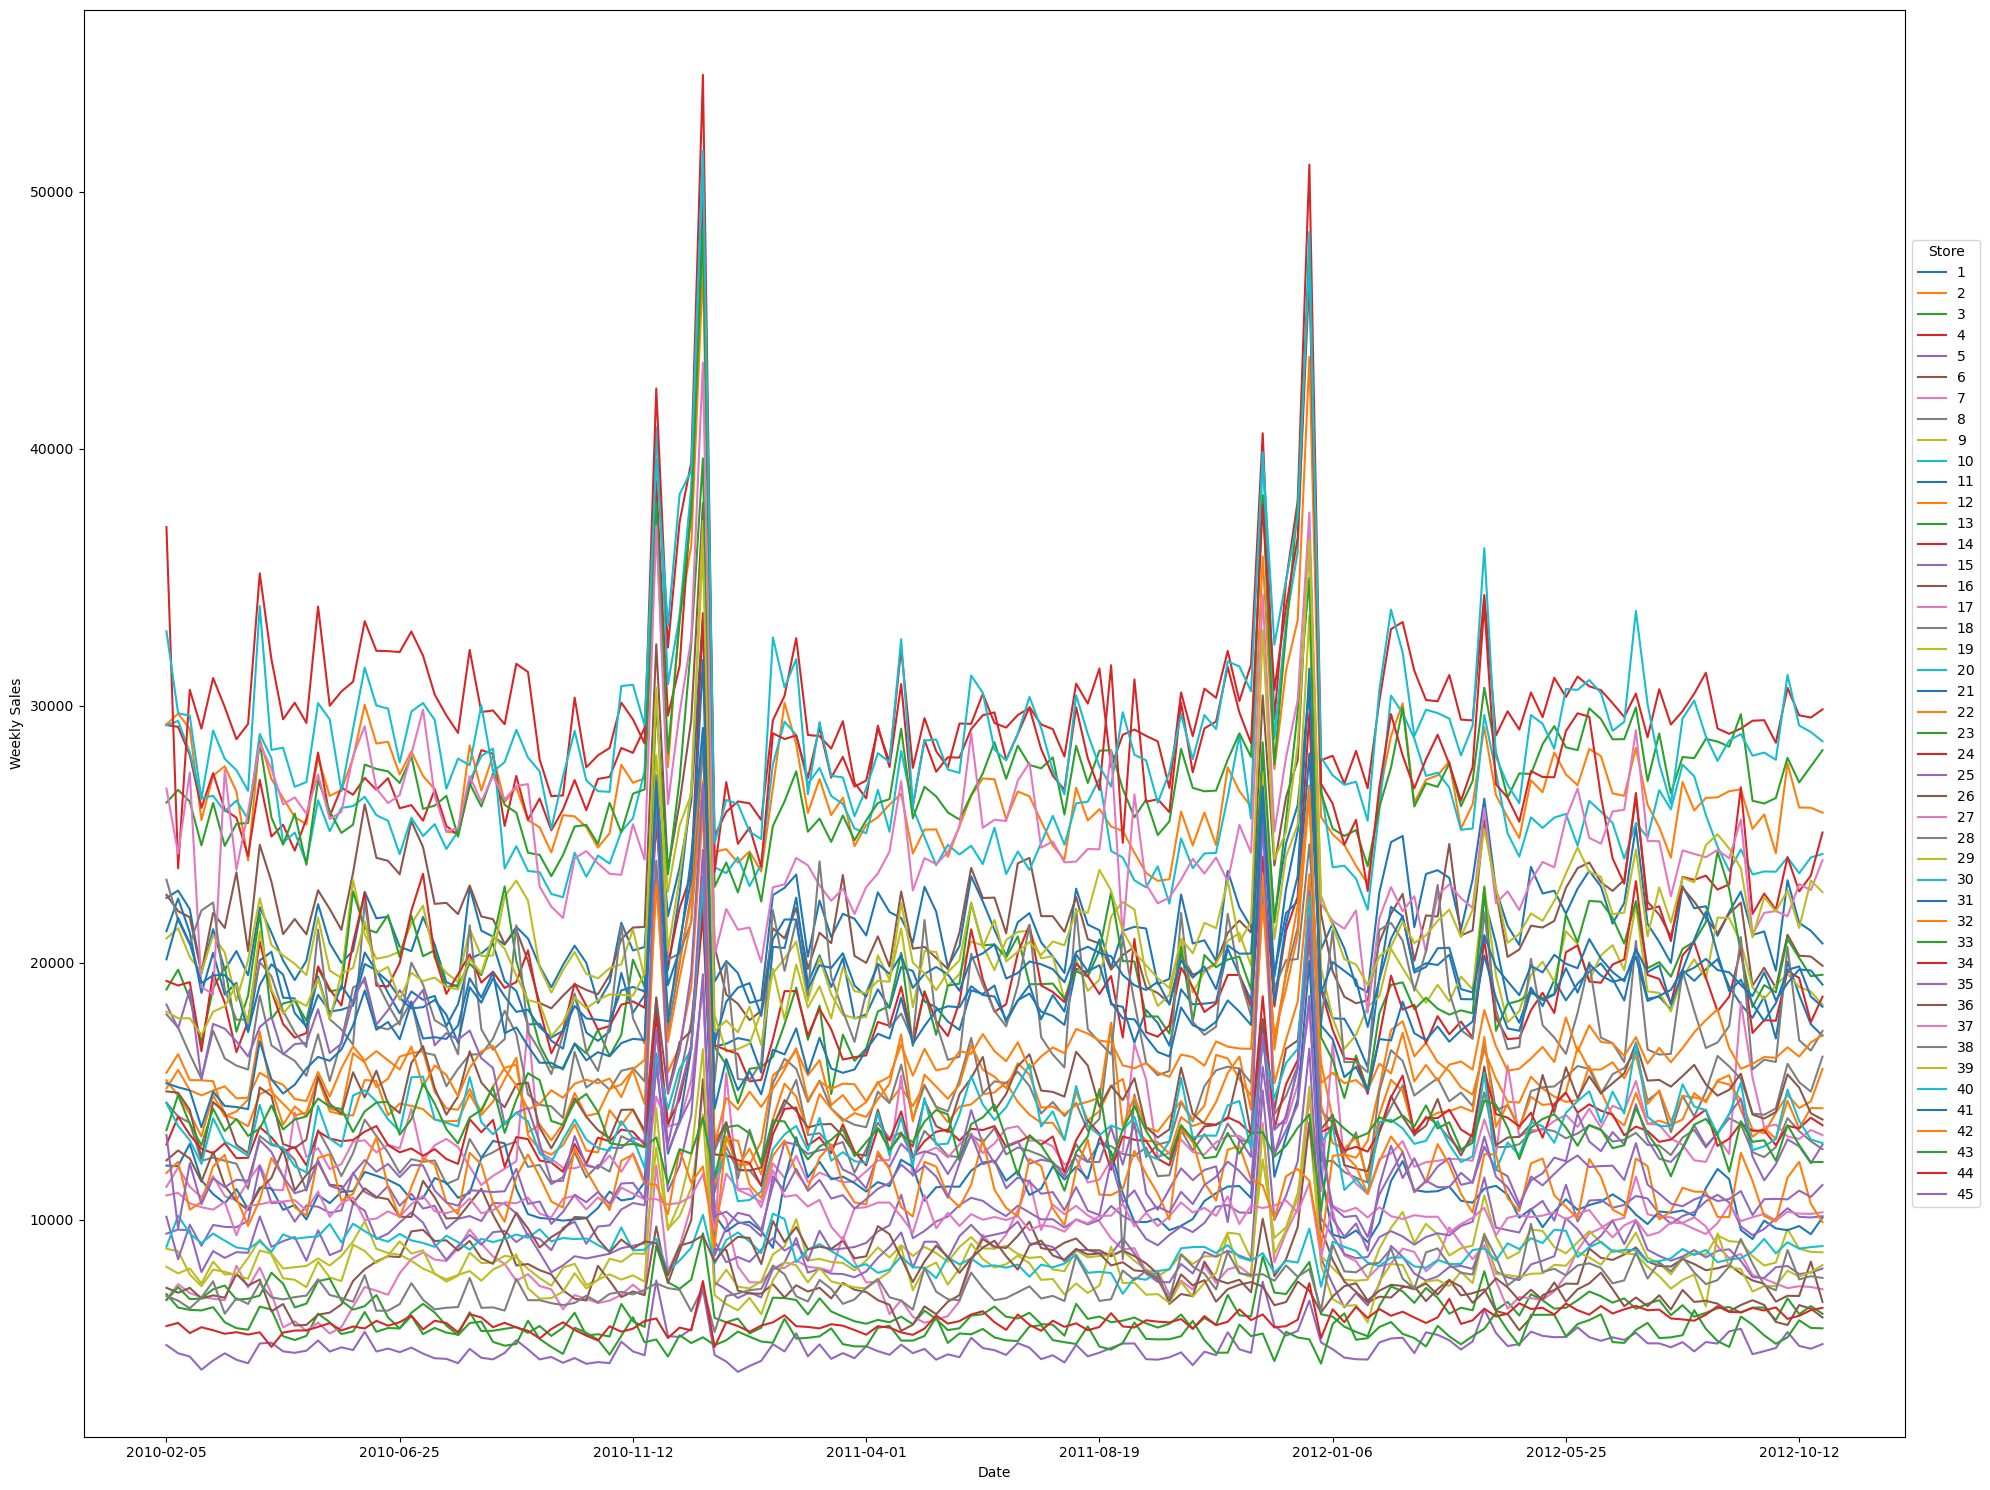

In [4]:
data = data.pivot_table(index='Date', columns='Store', values='Weekly_Sales')

ax = data.plot(figsize=(20, 15))                                        
ax.set_ylabel('Weekly Sales')                                          
ax.legend(title='Store', loc='center left', bbox_to_anchor=(1.0, 0.5)) 
plt.tight_layout()                                                      
plt.show()

In [5]:
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.api import VAR

train = data.iloc[:-10,:]                                  # Use all rows except the last 10 as training data
test = data.iloc[-10:,:]                                   # Use the last 10 rows as test data

model = VAR(train)                                         # Initialize the VAR model with training data
results = model.fit(maxlags=2)                             # Fit the model using up to 2 lags

lag_order = results.k_ar                                   # Get the selected lag order used in the fitted model
fcst = results.forecast(train.values[-lag_order:], 10)     # Forecast the next 10 steps using the last lagged observations

model_accuracy = 1 - mean_absolute_percentage_error(test, fcst)  # Compute accuracy as 1 - MAPE

print('1 - MAPE:',model_accuracy)                          # Print model accuracy score

1 - MAPE: 0.8911349592624235


# 10. The VARMAX Model

In [6]:
# Import the dataframe

url1 = ('https://raw.githubusercontent.com/abhinav-bhardwaj/Walmart-Sales-Time-Series-Forecasting-Using-Machine-Learning/refs/heads/master/datasets/train.csv')

data = pd.read_csv(url1)

data.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [7]:
exog = data.groupby('Date')['IsHoliday'].sum() > 0     # Group by date and check if any store has a holiday on that date (returns True/False)
exog = exog.apply(lambda x: float(x))                  # Convert boolean values to floats: True → 1.0, False → 0.0

data = data.pivot_table(index='Date',                  # Reshape the DataFrame:
                        columns='Store',               # - Each column becomes a store
                        values='Weekly_Sales')         # - Values are weekly sales per store per date

data.head()

Store                 1             2            3             4   \
Date                                                                
2010-02-05  22516.313699  29273.828219  7101.880308  29248.546164   
2010-02-12  22804.964444  29691.798611  6573.890000  29177.431867   
2010-02-19  22081.755753  29102.075890  6486.802923  28080.277534   
2010-02-26  19579.549861  25549.277671  6463.569206  26023.362703   
2010-03-05  21298.721644  27274.152466  6590.508571  27375.797778   

Store                5             6            7             8            9   \
Date                                                                            
2010-02-05  5115.695161  22638.836986  6898.964444  14552.711449  8862.992742   
2010-02-12  4797.318462  22003.888493  7487.213143  14011.287324  8772.658413   
2010-02-19  4668.424154  21765.806528  7137.472394  13770.862429  7866.583077   
2010-02-26  4158.178923  19629.496027  6987.087887  12283.943623  7402.707344   
2010-03-05  4513.370469  21936.285205  6921.402113  12415.548592  8052.347302   

Store                 10  ...            36            37           38  \
Date                      ...                                            
2010-02-05  29240.650000  ...  12303.861579  10938.912857  7029.336078   
2010-02-12  29405.790811  ...  12690.910811  11038.597917  6844.298000   
2010-02-19  28179.101067  ...  12375.816579  10632.968750  6544.758400   
2010-02-26  26404.933684  ...  11474.857436  10481.955510  6962.973542   
2010-03-05  26494.534533  ...  12636.932368  10385.113600  7596.732449   

Store                 39            40            41            42  \
Date                                                                 
2010-02-05  18097.011765  14520.924638  15303.284225  11812.695870   
2010-02-12  17834.212254  13647.689857  15150.089296  12249.148085   
2010-02-19  17834.666232  13089.845714  15029.067714  10383.568776   
2010-02-26  17185.029706  12167.850845  13588.242877  10685.012609   
2010-03-05  18089.345857  13945.806761  14979.682958  12064.617826   

Store                 43           44            45  
Date                                                 
2010-02-05  13479.776667  5856.061458  13293.873284  
2010-02-12  14846.065000  5976.190208   9661.597647  
2010-02-19  13729.115625  5582.422917  12192.232464  
2010-02-26  12889.641458  5810.192979  10598.452143  
2010-03-05  14317.392391  5692.345400  11611.212239  

[5 rows x 45 columns]

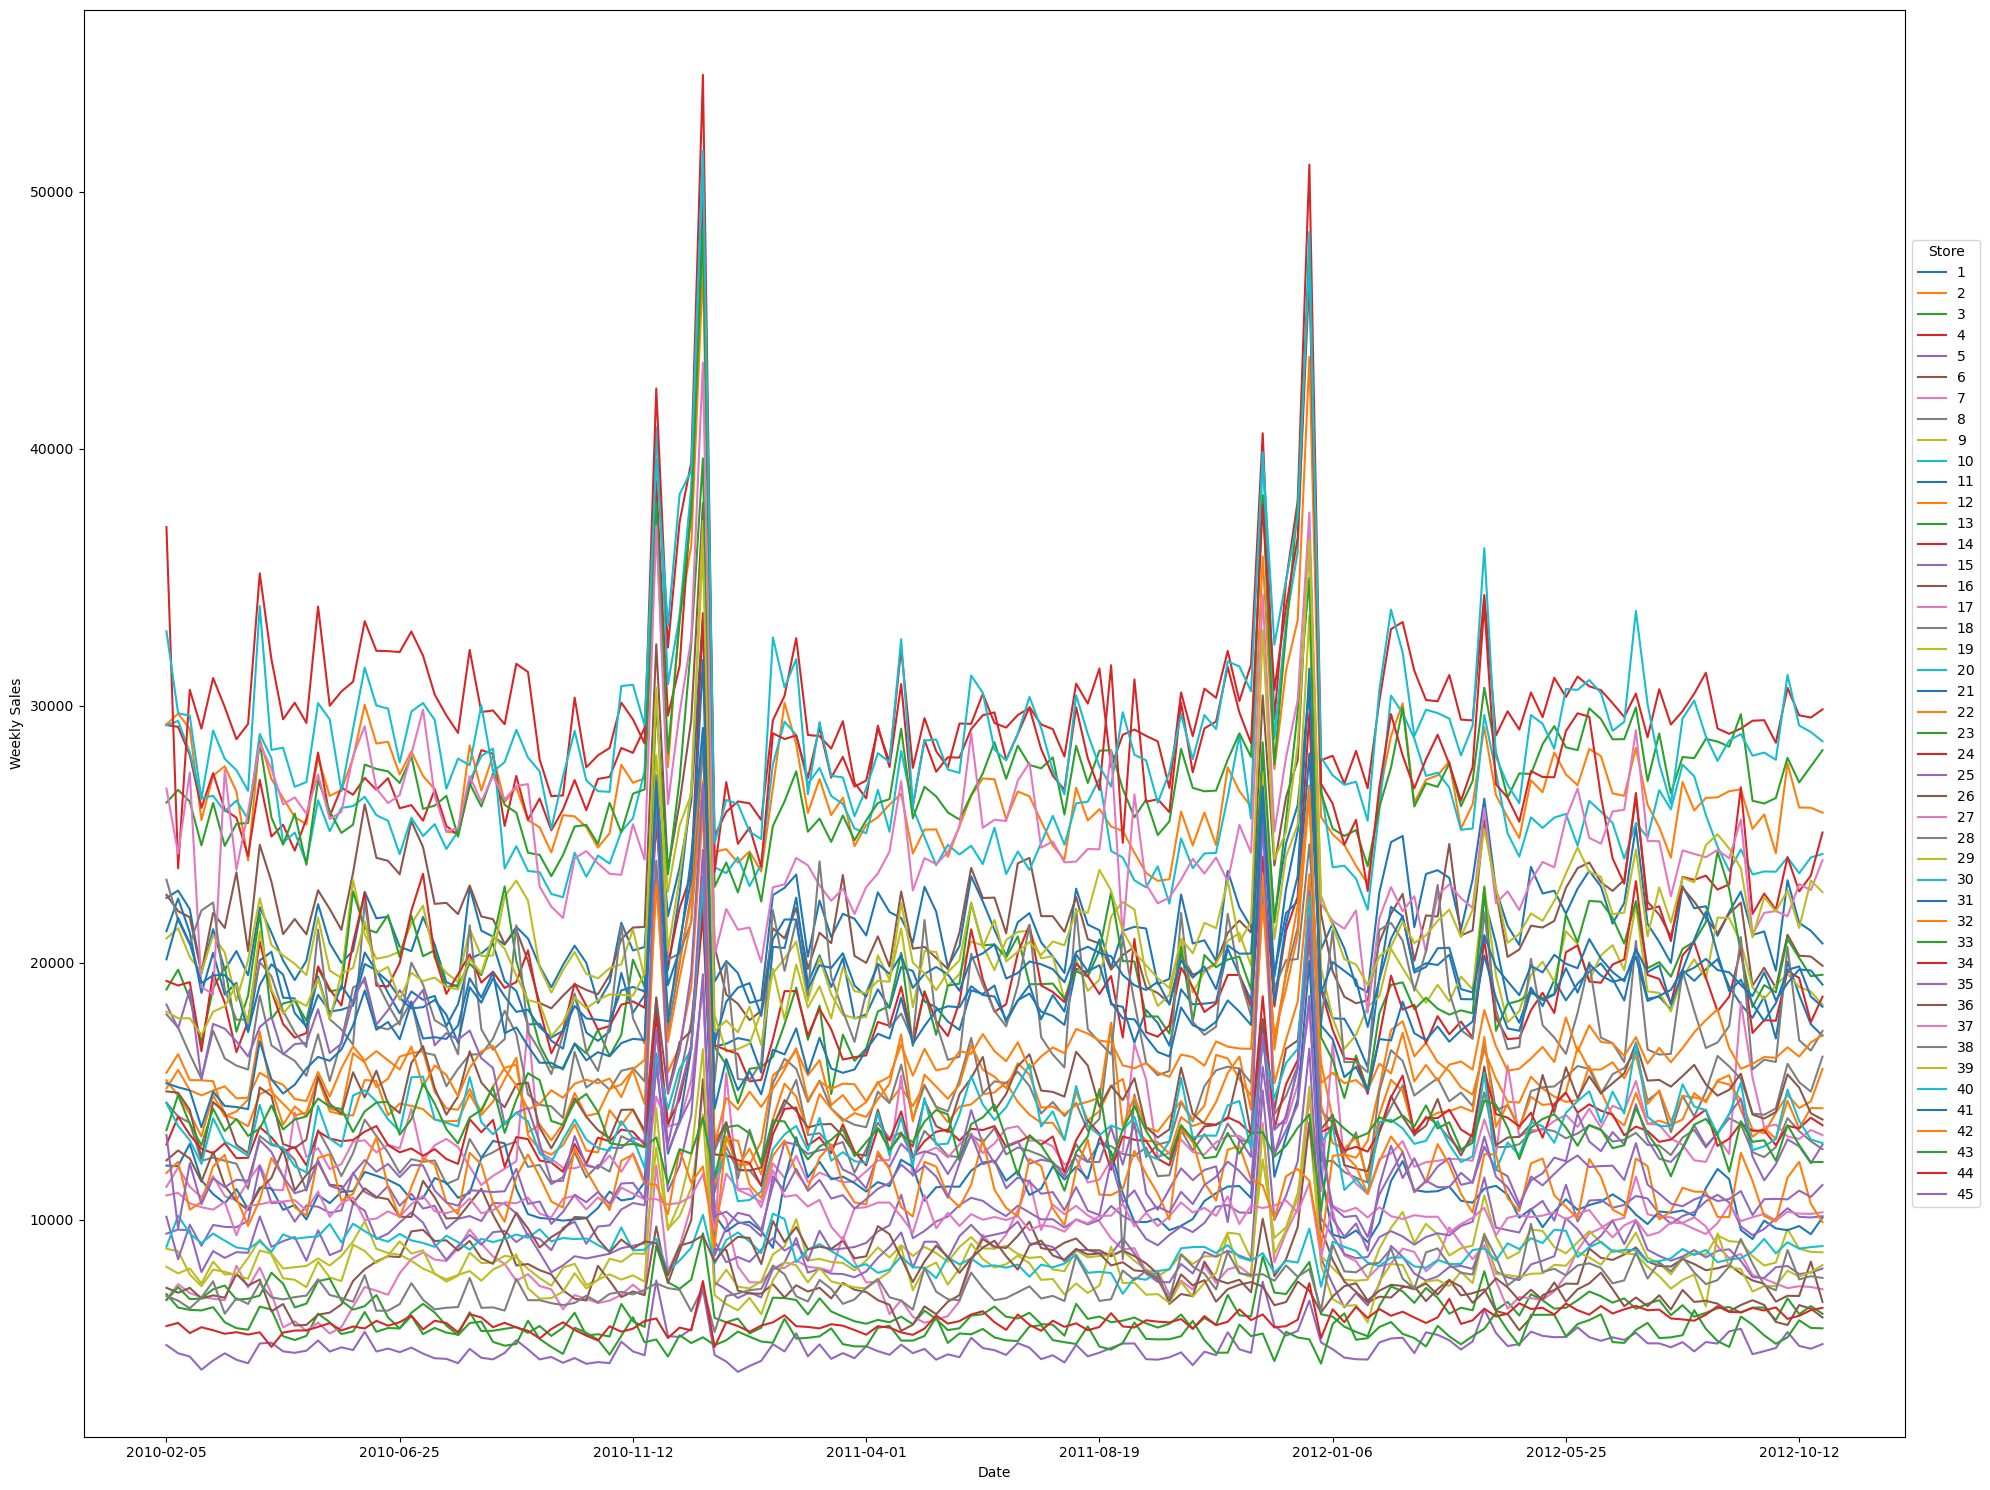

In [8]:
ax = data.plot(figsize=(20, 15))                                        
ax.set_ylabel('Weekly Sales')                                          
ax.legend(title='Store', loc='center left', bbox_to_anchor=(1.0, 0.5)) 
plt.tight_layout()                                                      
plt.show()

In [9]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error

import warnings
from statsmodels.tools.sm_exceptions import EstimationWarning
warnings.simplefilter('ignore', EstimationWarning)


train = data.iloc[:-10, [0,1,2]]              # Select the first 3 columns from all rows except the last 10 as training data
test = data.iloc[-10:, [0,1,2]]               # Select the first 3 columns from the last 10 rows as test data

train_exog = exog[:-10]                       # Use all exogenous values except the last 10 for training
test_exog = exog[-10:]                        # Use the last 10 exogenous values for forecasting

mod = sm.tsa.VARMAX(train, order=(1,1),       # Define a VARMAX model with AR(1) and MA(1)
                    exog=train_exog)          # Include the exogenous variable for the training phase

res = mod.fit(maxiter=100, disp=False)        # Fit the model with a maximum of 100 iterations and suppress output

fcst = res.forecast(exog=test_exog.values,    # Forecast the next 10 steps using the test exogenous values
                    steps=10)

mape = mean_absolute_percentage_error(test, fcst)   # Calculate the MAPE between the forecast and actual values
model_accuracy = 1 - mape                           # Convert MAPE into accuracy (1 - error)

print('1 - MAPE:',model_accuracy)             # Output the model's accuracy score

1 - MAPE: 0.9621369180695298
